<a href="https://colab.research.google.com/github/pablonicolasr/diplodatos-iaa-2022-grupo32/blob/Seba_IntroML/Lab_2_SGO_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [ ]:
import numpy as np
import pandas as pd

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [ ]:
dataset = pd.read_csv("./data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
dataset

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106
...,...,...,...,...,...,...,...,...,...,...,...
1849,1,53400,228236.0,305514.0,6.0,0.0,0.0,11.148069,0.0,2.0,34.558417
1850,1,53600,235895.0,299772.0,5.0,0.0,0.0,112.748282,7.0,22.0,44.945929
1851,1,53600,208197.0,297280.0,4.0,1.0,1.0,160.485251,2.0,29.0,41.646731
1852,1,65500,205156.0,290239.0,2.0,0.0,0.0,98.808206,1.0,21.0,144.189001


In [ ]:
X_train

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
1240,9400,92340.0,125451.0,7.0,0.0,0.0,129.113725,1.0,22.0,36.349975
1183,14800,43983.0,60826.0,4.0,1.0,1.0,113.897967,1.0,9.0,27.108082
692,20100,59726.0,79982.0,8.0,1.0,0.0,74.210759,2.0,28.0,36.846922
871,25200,73168.0,93608.0,9.0,0.0,0.0,151.121480,0.0,21.0,35.590327
1353,17000,70039.0,100993.0,7.0,0.0,0.0,261.911317,1.0,11.0,36.564330
...,...,...,...,...,...,...,...,...,...,...
835,15900,48563.0,64679.0,4.0,0.0,0.0,156.101381,2.0,12.0,27.808547
1216,27500,150666.0,192346.0,3.0,0.0,0.0,177.871473,0.0,17.0,39.978650
1653,12800,54151.0,83828.0,13.0,0.0,0.0,132.160270,0.0,16.0,23.477426
559,21300,63263.0,94180.0,1.0,0.0,0.0,138.348455,1.0,22.0,35.549295



Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

1 - El conjunto de datos contiene información de línea de base y rendimiento de préstamos de un banco, para 5960 solicitantes. El departamento de crédito al consumo, pretende automatizar la toma de decisiones para la aprobación de líneas de crédito con garantía hipotecaria. Para ello, buscan seguir las recomendaciones de la Ley de Igualdad de Oportunidades de Crédito para crear un modelo de calificación crediticia empíricamente derivado y estadísticamente sólido. El modelo se basará en datos recopilados de los solicitantes recientes a los que se les otorgó crédito a través de el proceso actual de suscripción de préstamos. El modelo se construirá a partir de herramientas de modelado predictivo, pero el modelo creado debe ser lo suficientemente interpretable para proporcionar una razón para cualquier acción adversa (rechazos).

2 - La variable objetivo (TARGET) es una variable binaria que indica si un solicitante finalmente incumplió o estuvo gravemente en mora. Este resultado adverso ocurrió en 1.189 casos (20%).

* TARGET: 1 = cliente incumplió con el préstamo - 0 = préstamo reembolsado

3 - A continuación se detallan los atributos para elaborar la predicción.

* LOAN Importe de la solicitud de préstamo
* MORTDUE Monto adeudado sobre la hipoteca existente
* VALUE Valor de la propiedad actual
* YOJ Años en el trabajo actual
* DEROG Número de informes despectivos importantes
* DELINQ Número de líneas de crédito morosas
* CLAGE Antigüedad de la línea comercial más antigua en meses
* NINQ Número de líneas de crédito recientes
* CLNO Número de líneas de crédito
* DEBTINC Relación deuda-ingresos

4 - Es posible que las variables DELINQ y DEBTINC sean determinantes ya que demuestran directamente el perfil de cumplimiento del deudor (DELINQ) y sus posibilidades financieras para el pago de sus obligaciones (DEBTINC) 

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [ ]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(random_state=1)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f'Train accuracy: {train_acc:0.3}')
print(f'Test accuracy: {test_acc:0.3}')

Train accuracy: 0.804
Test accuracy: 0.814


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1232
           1       0.14      0.03      0.05       251

    accuracy                           0.80      1483
   macro avg       0.49      0.50      0.47      1483
weighted avg       0.71      0.80      0.75      1483



In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       313
           1       0.00      0.00      0.00        58

    accuracy                           0.81       371
   macro avg       0.42      0.48      0.45       371
weighted avg       0.71      0.81      0.76       371



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)
cmtrain = confusion_matrix(y_train, y_train_pred)
cmtest = confusion_matrix(y_test, y_test_pred)

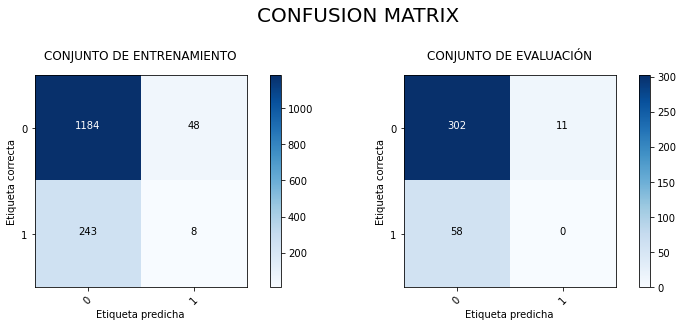

In [ ]:
from matplotlib import pyplot as plt
from utils import plot_confusion_matrix

plt.figure(figsize=(12,4.5))
plt.suptitle('CONFUSION MATRIX', x=0.58, y=1, fontsize=20)

plt.subplot(1, 2, 1)
plot_confusion_matrix(cmtrain, [0, 1])
plt.title('CONJUNTO DE ENTRENAMIENTO', pad=16)

plt.subplot(1, 2, 2)
plot_confusion_matrix(cmtest, [0, 1])
plt.title('CONJUNTO DE EVALUACIÓN', pad=16)
plt.tight_layout(h_pad=5, w_pad=5)

## Conclusiones Ejercicio 2.1

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Para el presente trabajo, es importante detectar los solicitantes que posiblemente no pagarán sus obligaciones crediticias. Tanto el indicador Recall como Precision mostraron valores muy bajos para la predicción de futuros morosos. Sin embargo, el indicador **Recall es más relevante que el indicador Precision**, ya que Recall me indica la capacidad del modelo para predecir solicitantes que no pagarán el préstamo, sobre la totalidad de los que realmente no pagarán. Precision en cambio, me indica la capacidad del modelo de predecir solicitantes que no pagarán, sobre la totalidad de los que predije que no pagarán. En este último caso, el problema está en negarles el préstamo a quienes realmente lo pagarían.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Otro indicador importante que normalmente se usa es **Accuracy**. Sin embargo, este indicador no es recomendable en casos donde el conjunto de datos tiene desbalanceados los registros entre etiquetas, como es el caso del presente dataset. Justamente aquí se da el caso que Accuracy es relativamente alto (0.8) y sin embargo el modelo es muy malo para predecir los solicitantes que no pagarán sus préstamos.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Finalmente, podemos nombrar a **F1-Score** como un indicador interesante por su balance entre Precision y Recall, sin verse afectado por el desbalance en las etiquetas reales del conjunto de datos. No obstante, para el caso específico de este dataset, Recall es el indicador más efectivo para evaluar la calidad del modelo en función de los objetivos del banco.  

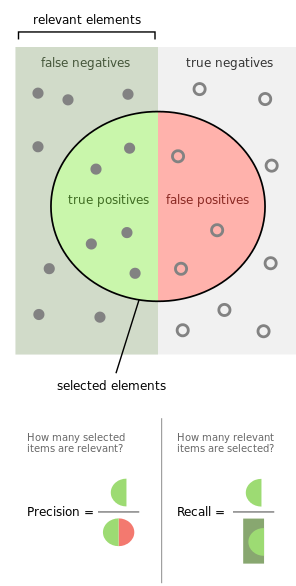 
Fte: https://steemit.com/spanish/@waster/explicacion-alternativa-para-accuracy-precision-recall-y-f1-score 

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
# Establecemos diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.
param_grid = {'loss': ['hinge', 'perceptron', 'log'], 'penalty':['l1','l2','none'], 'max_iter': [10,100,1000], 
              'learning_rate':['constant', 'optimal', 'invscaling', 'adaptive']}
print(param_grid)

{'loss': ['hinge', 'perceptron', 'log'], 'penalty': ['l1', 'l2', 'none'], 'max_iter': [10, 100, 1000], 'learning_rate': ['constant']}


In [ ]:
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
cv.fit(X_train, y_train)

results = cv.cv_results_
params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score'];

ValueError: eta0 must be > 0

In [ ]:
import pandas as pd
df = pd.DataFrame(results)
df[['rank_test_score', 'mean_test_score','param_alpha', 'param_loss', 'param_penalty']].sort_values('rank_test_score')

In [ ]:
# Ver cómo se aplica el kfold
# piden que se haga el gridsearch sobre el conjunto de entranamiento; pero en el notebook de Seleccion de modelos se hace 
# sobre el conjunto total (X,y)
# Tasa de entrenamiento es lo mismo que tasa de aprendizaje?
# Podríamos graficar la variación del meanscore en función del alpha y para distintas penalidades
# Es importante establecer interpretaciones de cada hiperparámetro. Por ejemplo, en el caso de la 
# penalidad, supuestamente se hace para evitar sobreajuste, por lo que talvez sea un error colocar la opción "none"

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html